In [27]:
# install all the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE 
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer 

In [28]:
file_path = 'C:\\allAccountsSending\\github projects\\predict_owned.csv'
data = pd.read_csv(file_path)
data

,Used it for,Ownership,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3,4,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3,1,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4,4,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1,1,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3,4,NaN,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...
708,Commuting,> 6 months,Gemopai Ryder,2,2,NaN,2.0,NaN,3.0
709,Leisure,<= 6 months,Gemopai Ryder,5,5,5.0,NaN,5.0,NaN
710,Commuting,> 6 months,Gemopai Ryder,2,2,3.0,NaN,1.0,NaN
711,Commuting,<= 6 months,Gemopai Ryder,4,4,NaN,4.0,NaN,5.0


In [29]:
# check the information of the data to know how pure it is
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Ownership         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    int64  
 4   Reliability       713 non-null    int64  
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 50.3+ KB


In [30]:
# check the number of unique values in each feature
data.nunique()

Used it for          2
Ownership            3
Model Name          38
Visual Appeal        5
Reliability          5
Extra Features       5
Comfort              5
Maintenance cost     5
Value for Money      5
dtype: int64

In [31]:
#check the value types for the Classs feature
set(data['Ownership'])

{'<= 6 months', '> 6 months', 'Never owned'}

In [32]:
# check for missing values in the features
data.isnull().sum()


Used it for           0
Ownership             0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
dtype: int64

In [33]:
# replace all missng values with 0
data = data.fillna(0)


In [34]:
# check the statistcal information about the dataset
data.describe()

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,3.768583,3.314165,0.751753,2.611501,0.837307,1.748948
std,1.359949,1.584523,1.524639,2.031834,1.617638,2.011924
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,3.000000,0.000000,1.000000
75%,5.000000,5.000000,1.000000,5.000000,0.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [35]:
# check the count of each value in the Owned for feature
data['Ownership'].value_counts()

> 6 months     290
<= 6 months    288
Never owned    135
Name: Ownership, dtype: int64

In [36]:
data['Ownership'] = data['Ownership'].replace({'<= 6 months':'Owned','> 6 month':'Owned'})


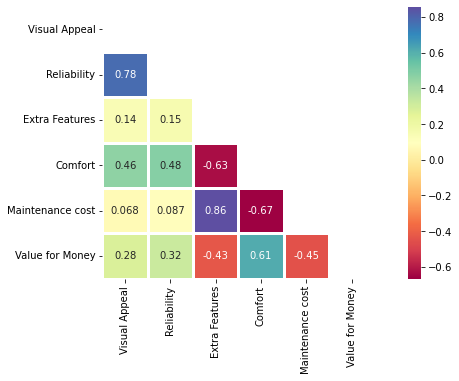

In [37]:
# compute the correlation coefficient of the features and visualze it
plt.figure(figsize=(12,5))
correllation = data.corr()
cover =  np.triu(correllation)
sns.heatmap(correllation, annot = True, linewidths = 3, mask = cover, cmap = 'Spectral', square= True)
plt.show()


Text(0.5, 1.0, 'Percentage of ownership')

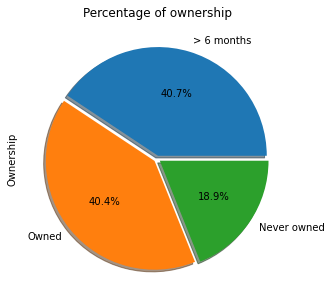

In [38]:
# compute percentage of ownership

data['Ownership'].value_counts().plot.pie(explode = [0.03, 0.03, 0.03], autopct = '%1.1f%%', shadow=True, figsize=(6,5))
plt.title('Percentage of ownership')

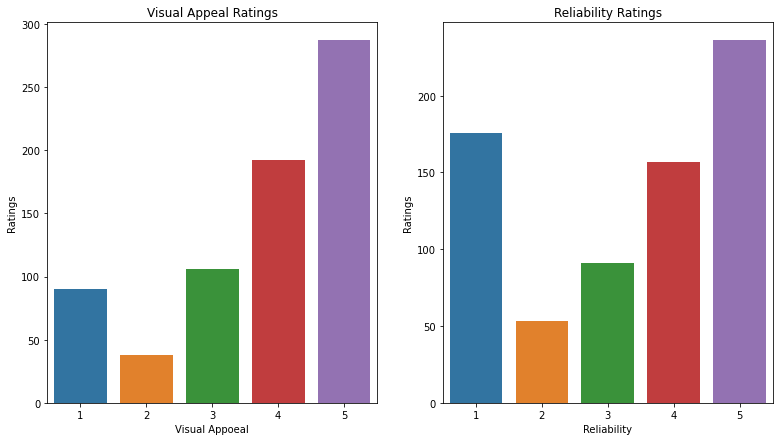

In [39]:
# creating two bar charts for the visual appeal and reliability ratings
fig, axes = plt.subplots(1,2, figsize=(13,7))

ax1 = sns.countplot(x='Visual Appeal', data = data, ax = axes[0])
ax1.set(xlabel = 'Visual Appoeal', ylabel= 'Ratings', title = 'Visual Appeal Ratings')

ax1 = sns.countplot(x='Reliability', data = data, ax = axes[1])
ax1.set(xlabel = 'Reliability', ylabel= 'Ratings', title = 'Reliability Ratings')

plt.show()

In [40]:
def owned(x):
    if x == 'Never owned':
        return (1)
    return (0)
data['Ownership'] = data['Ownership'].apply(owned)


In [55]:
# encode categorical variables to numeric using the ordinal encoder
feature = ['Used it for' , 'Model Name']
encode = OrdinalEncoder()
data[feature] = encode.fit_transform(data[feature])

data
data['Ownership'].value_counts()

0    578
1    135
Name: Ownership, dtype: int64

In [42]:
# split the data into the train and test sets and normalize the train set before training
normal_data = data.drop('Ownership', axis = 1)
target_variable = data['Ownership']
normal_data_array = normal_data.values
normalized_data = Normalizer().fit(normal_data_array).transform(normal_data_array)
normalized_data


array([[0.        , 0.98010223, 0.09188458, ..., 0.12251278, 0.        ,
        0.03062819],
       [0.03081668, 0.98613368, 0.09245003, ..., 0.09245003, 0.        ,
        0.09245003],
       [0.        , 0.97148279, 0.12143535, ..., 0.15179419, 0.        ,
        0.06071767],
       ...,
       [0.        , 0.93300782, 0.16963779, ..., 0.        , 0.08481889,
        0.        ],
       [0.        , 0.78975397, 0.28718326, ..., 0.28718326, 0.        ,
        0.35897908],
       [0.        , 0.82448486, 0.22485951, ..., 0.29981268, 0.        ,
        0.29981268]])

In [43]:
X = normalized_data
y = target_variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (499, 8)
X_test shape (214, 8)
y_train shape (499,)
y_test shape (214,)


In [44]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (812, 8)
X_test shape (344, 8)
y_train shape (812,)
y_test shape (344,)


In [51]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf_2 = DecisionTreeClassifier()

clf_2.fit(X_train, y_train)

y_pred_2 = clf_2.predict(X_test)




In [52]:
print(f'Confusion matrix{confusion_matrix(y_test, y_pred)}')
print(f'F1 score : {f1_score(y_test, y_pred)}')
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

Confusion matrix[[ 94  78]
 [ 50 122]]
F1 score : 0.6559139784946236
accuracy: 0.627906976744186


In [53]:
print(f'Confusion matrix{confusion_matrix(y_test, y_pred_2)}')
print(f'F1 score : {f1_score(y_test, y_pred_2)}')
print(f'accuracy: {accuracy_score(y_test, y_pred_2)}')

Confusion matrix[[141  31]
 [ 85  87]]
F1 score : 0.6
accuracy: 0.6627906976744186


<AxesSubplot:>

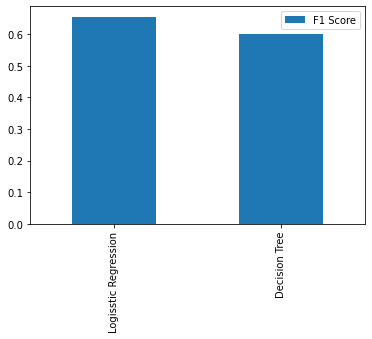

In [56]:
model_scores = {'Logisstic Regression': f1_score(y_test, y_pred), 'Decision Tree':f1_score(y_test, y_pred_2) }

model_compare = pd.DataFrame(model_scores, index=['F1 Score'])
model_compare.T.plot(kind='bar')